In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lasio

In [2]:
#Computing mean stress (p) and shear stress (q)
# index : 0 1 2 3 4 --> A B C D E
sigma1 =[9839.47,10478.53,9921.27,10734.15,11383.44]  #sigma1 : maximum horizontal stress, psi
sigma2 =[8566.46,8931.11,8505.11,9563.39,9333.33]     #sigma2 : minimum horizontal stress, psi
sigma3 =[8914.11,9604.29,8995.91,9261.76,9619.63]     #sigma3 : vertical stress, psi
p=[]   #p: mean stress
q=[]   #q: shear stress

#For-loop to calculate p and q for index 0 to 4 
for i in range (len(sigma1)):
    pp = (sigma1[i]+sigma2[i]+sigma3[i])/3
    qq = (0.5*((sigma1[i]-sigma2[i])**2+(sigma1[i]-sigma3[i])**2+(sigma2[i]-sigma3[i])**2))**0.5
    pp = round(pp,2)
    qq = round(qq,2)
    p.append(pp)
    q.append(qq)
print(p)
print(q)

[9106.68, 9671.31, 9140.76, 9853.1, 10112.13]
[1139.67, 1343.87, 1245.53, 1347.14, 1923.01]


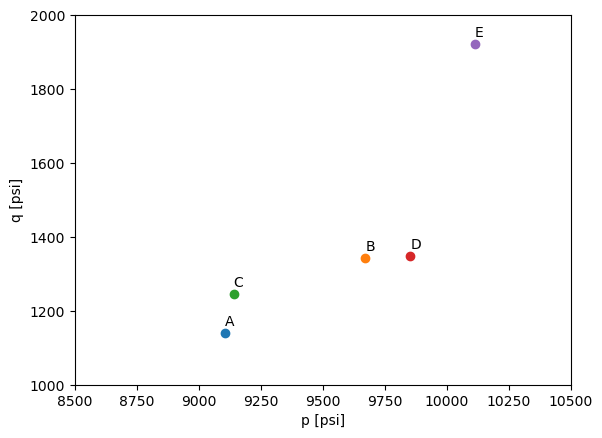

In [3]:
#Ploting the results of p vs q
# Index 0 -> A
# Index 1 -> B
# Index 2 -> C
# Index 3 -> D
# Index 4 -> E
fig, ax = plt.subplots()
lab = ['A','B','C','D','E']
for i in range (len(p)):
    ax.plot(p[i],q[i],marker='o')
    plt.text(p[i],q[i]+20,lab[i])
plt.xlabel("p [psi]")
plt.ylabel("q [psi]")
plt.xlim(8500,10500)
plt.ylim(1000,2000)
plt.show()

In [4]:
#Reading stress log and deviation survey data
logdata = lasio.read('1_14-1_Composite.las')
log_df=logdata.df()
dev_df = pd.read_csv('1_14-1_deviation_mod.csv')
log_df.reset_index(inplace=True) #separate DEPTH column
log_df.head()

,DEPTH,CALI,DRHO,DT,GR,NPHI,PEF,RHOB,RS,RT,RXO,SP
0,114.1964,NaN,NaN,NaN,4.3438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114.3488,NaN,NaN,NaN,5.2109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114.5012,NaN,NaN,NaN,5.2422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,114.6536,NaN,NaN,NaN,5.8164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,114.8060,NaN,NaN,NaN,5.2539,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
log_df.describe()

,DEPTH,CALI,DRHO,DT,GR,NPHI,PEF,RHOB,RS,RT,RXO,SP
count,25630.000000,19657.000000,19661.000000,24967.000000,25630.000000,19658.000000,1907.000000,19657.000000,24968.000000,24968.000000,0.0,24957.000000
mean,2067.126200,17.072235,-0.020254,119.539109,31.495521,32.128587,10.175848,2.333409,1.891182,1.490793,NaN,36.124393
std,1127.590537,3.366884,0.047830,28.036375,16.227671,9.569125,7.648419,0.229688,22.144687,0.865805,NaN,6.999355
min,114.196400,2.693500,-0.766800,44.962900,2.884800,1.721900,3.569600,1.618200,0.259800,0.244100,NaN,14.404800
25%,1090.661300,13.653900,-0.029400,96.375850,21.641250,25.295300,5.656250,2.136700,0.752075,0.937000,NaN,33.555200
50%,2067.126200,17.234300,-0.019800,108.250000,28.494500,30.521200,8.468900,2.428700,1.304900,1.368500,NaN,38.521400
75%,3043.591100,19.484400,-0.007700,145.004500,41.154050,38.569025,11.131850,2.523000,2.063250,1.872225,NaN,40.499500
max,4020.056000,23.037500,0.529700,260.956400,197.875000,65.080500,78.944900,2.864100,2000.000000,15.617500,NaN,56.326800


In [6]:
dev_df.describe()

,MD(m),TVDSS(m),X(m),Y(m)
count,4022.000000,4022.000000,4022.000000,4.022000e+03
mean,2010.467426,1984.628131,144989.424922,1.704977e+06
std,1161.168587,1160.330751,15.271662,1.354265e+01
min,0.000000,-25.000000,144965.050100,1.704951e+06
25%,1005.244242,980.213470,144974.401725,1.704966e+06
50%,2010.475840,1985.010800,144991.086850,1.704983e+06
75%,3015.679822,2989.184080,145005.233525,1.704985e+06
max,4020.916040,3993.304930,145007.000000,1.705002e+06


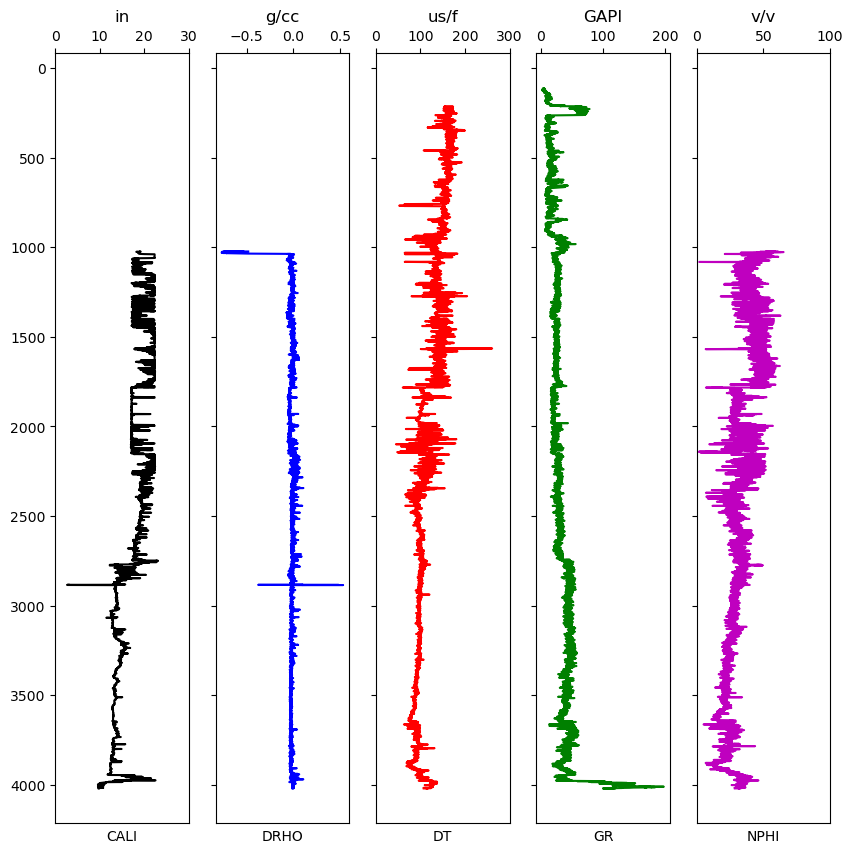

In [7]:
#Plotting Log data
plt.rcParams['xtick.bottom']=plt.rcParams['xtick.labelbottom']=False
plt.rcParams['xtick.top']=plt.rcParams['xtick.labeltop']=True
plt.rcParams["figure.figsize"] = (10,10)
colname1=['CALI','DRHO','DT','GR','NPHI']
col1=['k','b','r','g','m']

fig,ax=plt.subplots(1,len(colname1), sharey=True)
for i in range (len(colname1)):
    ax[i].plot(log_df[colname1[i]],log_df['DEPTH'],color=col1[i])
    ax[i].set_xlabel(colname1[i])
ax[0].invert_yaxis()
ax[0].set_xlim(0,30)
ax[2].set_xlim(0,300)
ax[4].set_xlim(0,100)
ax[0].set_title('in')
ax[1].set_title('g/cc')
ax[2].set_title('us/f')
ax[3].set_title('GAPI')
ax[4].set_title('v/v')
plt.savefig('Log plot1.png')

In [8]:
#Computing TVDSS and correcting bulk density value (RHOB)
log_df["TVDSS"]=np.interp(log_df["DEPTH"],dev_df["MD(m)"],dev_df["TVDSS(m)"])
log_df["RHOB_corr"]=log_df["RHOB"]+log_df["DRHO"]
log_df.fillna({'RHOB_corr':2.0},inplace=True)
print(log_df)

           DEPTH    CALI    DRHO        DT        GR     NPHI  PEF    RHOB  \
0       114.1964     NaN     NaN       NaN    4.3438      NaN  NaN     NaN   
1       114.3488     NaN     NaN       NaN    5.2109      NaN  NaN     NaN   
2       114.5012     NaN     NaN       NaN    5.2422      NaN  NaN     NaN   
3       114.6536     NaN     NaN       NaN    5.8164      NaN  NaN     NaN   
4       114.8060     NaN     NaN       NaN    5.2539      NaN  NaN     NaN   
...          ...     ...     ...       ...       ...      ...  ...     ...   
25625  4019.4464  9.7786 -0.0030  117.1809  117.5174  32.0139  NaN  2.5683   
25626  4019.5988  9.7786 -0.0006  117.1875  112.4196  30.6962  NaN  2.5733   
25627  4019.7512  9.7786 -0.0007  116.5666  111.6314  30.3350  NaN  2.5550   
25628  4019.9036  9.7786 -0.0060  111.2228  105.8625  29.0127  NaN  2.5267   
25629  4020.0560  9.7786 -0.0097  107.4000  100.9794  28.6232  NaN  2.4956   

           RS      RT  RXO       SP        TVDSS  RHOB_corr  
0

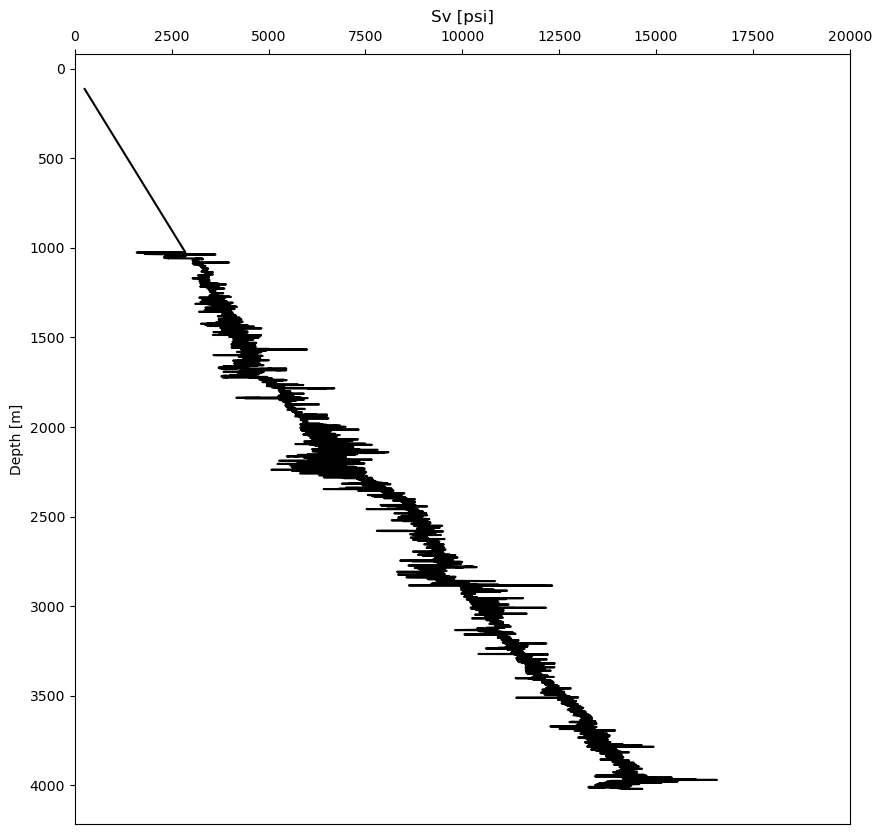

In [9]:
#Calculate and plot the total vertical stress
plt.rcParams['xtick.bottom']=plt.rcParams['xtick.labelbottom']=False
plt.rcParams['xtick.top']=plt.rcParams['xtick.labeltop']=True
log_df["Sv(psi)"]=(log_df["RHOB_corr"]/2.3)*1*(log_df["TVDSS"]*3.28)
log_df["Sv(psi)"][log_df["DEPTH"]<=104]=0.433*(log_df["TVDSS"]*3.28)
fig,ax=plt.subplots()
ax.plot(log_df["Sv(psi)"],log_df["DEPTH"],color='k')
ax.invert_yaxis()
ax.set_ylabel("Depth [m]")
ax.set_title ("Sv [psi]")
ax.set_xlim(0,20000)
plt.savefig('Sv.png')

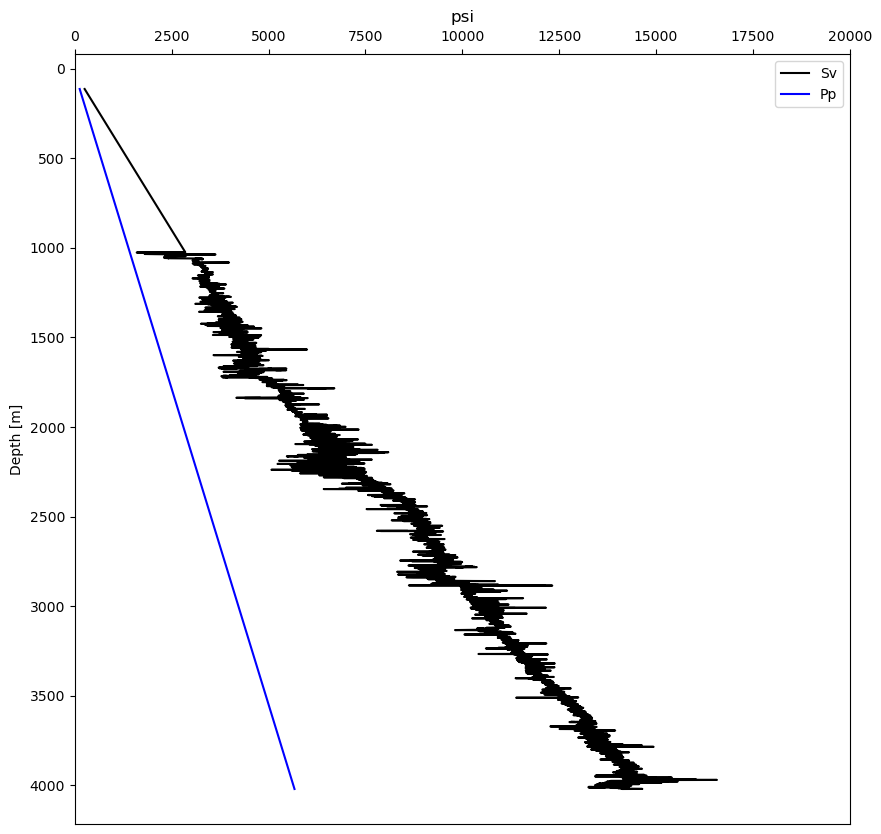

In [10]:
#Add hydrostatic pore pressure to the total vertical stress plot
log_df['Pp(psi)']=0.433*(log_df['TVDSS']*3.28)
fig, ax=plt.subplots()
ax.plot(log_df['Sv(psi)'],log_df['DEPTH'],color='k', label='Sv')
ax.plot(log_df['Pp(psi)'],log_df['DEPTH'],color='b', label='Pp')
ax.invert_yaxis()
ax.set_ylabel('Depth [m]')
ax.set_title('psi')
ax.set_xlim(0,20000)
plt.legend()
plt.savefig('Sv and Pp.png')